In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from research_utils.database.database import Database

## Percentage of Crowd Sourced Reqs

In [5]:
database = Database()

In [11]:
sql = """
SELECT CAST(a.crowd AS DECIMAL)/b.total as crowd_pct, a.package_id
FROM(
	SELECT COUNT(*) as crowd, package_id
	FROM open_source.issue_contributors
	WHERE commit_pct < {pct}
	GROUP BY package_id
) a
INNER JOIN (
	SELECT COUNT(*) as total, package_id
	FROM open_source.issue_contributors
	GROUP BY package_id
) b
ON a.package_id = b.package_id
"""

In [39]:
df = pd.read_sql(sql.format(pct=0.005), database.connection)

(0, 1)

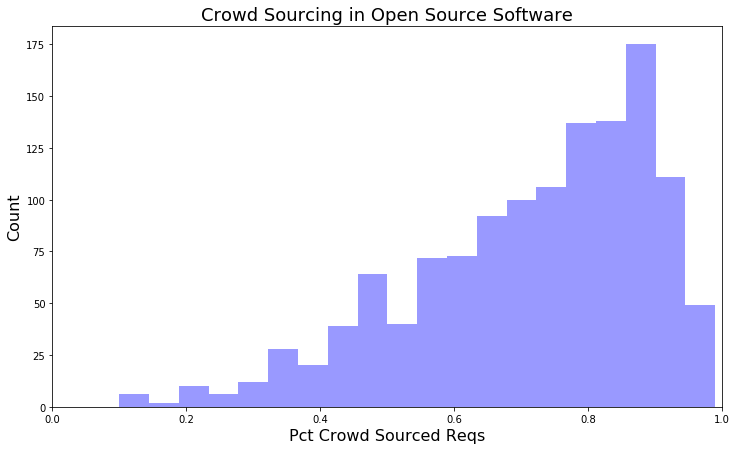

In [40]:
plt.figure(figsize=(12, 7))
sns.distplot(df['crowd_pct'], kde=False, color='blue', bins=20)
plt.title('Crowd Sourcing in Open Source Software', fontsize=18)
plt.xlabel('Pct Crowd Sourced Reqs', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0,1])